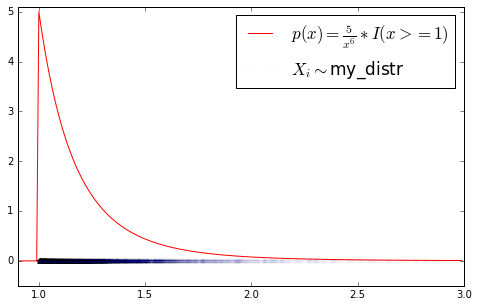

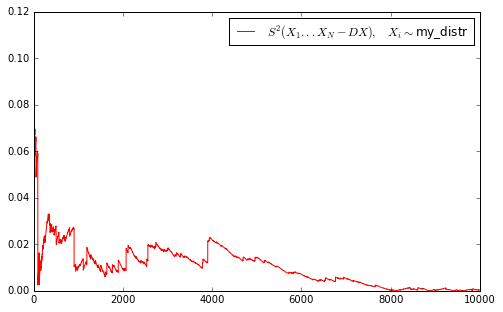

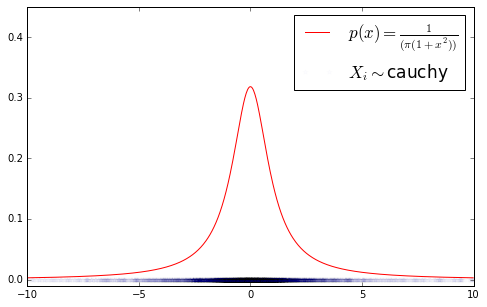

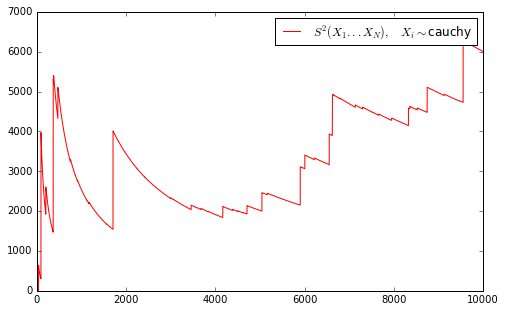

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

class my_distribution(stats.rv_continuous):
    # p(x) =  5 / x ^ 6  * I[x in [1:+inf)] 
    #тогда Ex^k  < inf при k \in [1 : 4], > inf при k \in [5; +inf)
    # p(x) > 0 => F не убывает
    # F[1] = 0 , F[+inf] = 1 
    # => F - функция распределения, p - ее плотность
    # первые 4 момента конечны, 5 момент бесконечен ( 1/x расходится на +inf )
    def _pdf(self, x):
        return 5 / (x ** 6)
    
my_distr = my_distribution(a=1, name = "my_distr")

#sample generation

def calc(distribution,
         curlabel,
         size,
         dispersion,
         ox_params,
         axis_params) :

    sample = distribution.rvs(size = N)

    #build plot
    OX = np.arange(ox_params[0],ox_params[1], ox_params[2])
    plt.figure(figsize=(8,5))
    plt.plot(OX,distribution.pdf(OX),'r', label = curlabel)
    plt.plot(sample,np.zeros(size) , '*b' , alpha = 0.01 , label = r'$X_i \sim $' + distribution.name);
    plt.legend(prop={'size' : 17})
    plt.axis(axis_params)
    plt.show()
    
    #calc evaluation
    ssum = 0
    ssum2 = 0
    delta_disp = np.zeros(size)
    for n in range(1,size + 1) :
        ssum += sample[n - 1]
        ssum2 += sample[n - 1] ** 2
        selection_disp = ssum2 / n - (ssum/n) ** 2
        delta_disp[n - 1] = abs(selection_disp - dispersion)
    
    OX = np.arange(1,size + 1)
    plt.figure(figsize=(8,5))
    if(dispersion == 0) :
         curlabel = r'$S^2(X_{1}... X_{N}), \quad X_{i} \sim $'
    else :
        curlabel = r'$S^2(X_{1}... X_{N} - DX), \quad X_{i} \sim $'
    plt.plot(OX,delta_disp,'r', label = curlabel + distribution.name)
    plt.legend(prop={'size' : 12})
    plt.show()


N = 10 ** 4
# выбранное распределение
my_disp = 5.0 / 48.0
calc(distribution = my_distr,
     curlabel = r'$p(x) = \frac{5}{x^6} * I(x >= 1)$',
     size = N ,
     dispersion = my_disp ,
     ox_params = [0.9, 3, 0.01] ,
     axis_params = [0.9 , 3 , -0.5 , 5.1])

#распределение коши
calc(distribution = stats.cauchy,
     curlabel = r'$p(x) = \frac{1}{(\pi(1 + x^2))}$',
     size = N,
     dispersion = 0,
     ox_params = [-10, 10, 0.03] ,
     axis_params = [-10 , 10 , -0.01 , 0.45])
